In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [10]:
df=pd.read_csv('C:/Users/valei/Documents/DATA SCIENCE- CODER HOUSE/00. Trabajo final/data_stroke.csv',sep=',')
df.head(10)

,id,Sexo,Edad,Hipertension,Enfermedad cardiaca,Casado,Trabajo,Residencia,Glucemia,IMC,Fumador,ACV
0,30669,Male,3,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [11]:
df.shape

(44944, 12)

In [12]:
df.dtypes

id                       int64
Sexo                    object
Edad                     int64
Hipertension             int64
Enfermedad cardiaca      int64
Casado                  object
Trabajo                 object
Residencia              object
Glucemia               float64
IMC                    float64
Fumador                 object
ACV                      int64
dtype: object

In [13]:
df.count()

id                     44944
Sexo                   44944
Edad                   44944
Hipertension           44944
Enfermedad cardiaca    44944
Casado                 44944
Trabajo                44944
Residencia             44944
Glucemia               44944
IMC                    43421
Fumador                31652
ACV                    44944
dtype: int64

Hay valores missing en IMC y Fumador

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44944 entries, 0 to 44943
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   44944 non-null  int64  
 1   Sexo                 44944 non-null  object 
 2   Edad                 44944 non-null  int64  
 3   Hipertension         44944 non-null  int64  
 4   Enfermedad cardiaca  44944 non-null  int64  
 5   Casado               44944 non-null  object 
 6   Trabajo              44944 non-null  object 
 7   Residencia           44944 non-null  object 
 8   Glucemia             44944 non-null  float64
 9   IMC                  43421 non-null  float64
 10  Fumador              31652 non-null  object 
 11  ACV                  44944 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.1+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44944.0,36311.469807,21068.668025,1.0,17998.50,36331.00,54499.2500,72943.00
Edad,44944.0,41.792408,22.740959,0.0,23.00,43.00,60.0000,82.00
Hipertension,44944.0,0.091514,0.288342,0.0,0.00,0.00,0.0000,1.00
Enfermedad cardiaca,44944.0,0.046947,0.211528,0.0,0.00,0.00,0.0000,1.00
Glucemia,44944.0,104.315062,42.913483,55.0,77.52,91.56,111.9925,291.05
IMC,43421.0,28.504671,7.801303,10.1,23.10,27.70,32.8000,97.60
ACV,44944.0,0.018467,0.134636,0.0,0.00,0.00,0.0000,1.00


Comenzamos analizando las variables que tienen valores missing 

In [16]:
# IMC
df.IMC.isna().sum()

1523

La cantidad de valores missing en la columna IMC es significativa y eliminarlos representaría una gran pérdida de información. 

<AxesSubplot:ylabel='IMC'>

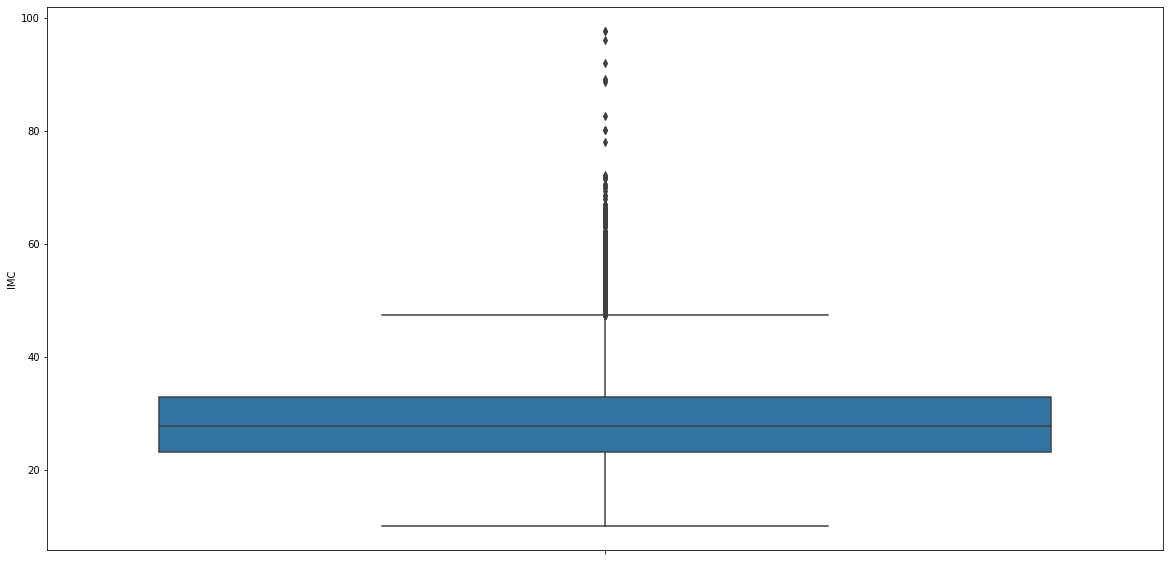

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=df.IMC.dropna())

Debido a que existen outliers, se decide completar los valores faltantes con la media del IMC.

In [40]:
df['IMC']=df['IMC'].fillna(df['IMC'].median())

# Chequeamos que no haya más 
print('Quedan',df.IMC.isna().sum(),'valores missing en la variable IMC')

Quedan 0 valores missing en la variable IMC


In [41]:
# Ahora analizamos la variable Fumador
df.Fumador.isna().sum()

13292

In [43]:
df.Fumador.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Unknown             1544
Name: Fumador, dtype: int64

<AxesSubplot:xlabel='Fumador', ylabel='count'>

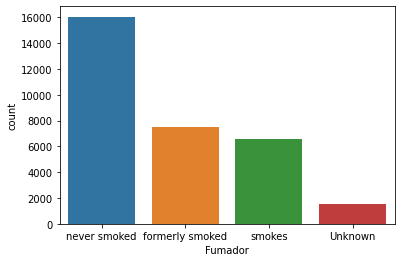

In [46]:
sns.countplot(x=df.Fumador, order = df.Fumador.value_counts().index)

Como se trata de datos categóricos se completan los valores faltantes con la moda de los datos. Como la moda es que nunca fumaron, no habría inconcistencia en los datos respecto a otras variables como la edad. 

In [50]:
df['Fumador']=df['Fumador'].fillna(df['Fumador'].mode()[0])

# Chequeamos que no haya más 
print('Quedan',df.Fumador.isna().sum(),'valores missing en la variable Fumador')

Quedan 0 valores missing en la variable Fumador


Volvemos a controlar que no queden valores missing en el data set

In [52]:
df.count()

id                     44944
Sexo                   44944
Edad                   44944
Hipertension           44944
Enfermedad cardiaca    44944
Casado                 44944
Trabajo                44944
Residencia             44944
Glucemia               44944
IMC                    44944
Fumador                44944
ACV                    44944
dtype: int64

La columna ID ya no será necesaria ya que solo hace referencia al número de identificación del paciente que para el análisis no es relevante. 

In [53]:
df=df.drop(columns=['id'])
df.head()

,Sexo,Edad,Hipertension,Enfermedad cardiaca,Casado,Trabajo,Residencia,Glucemia,IMC,Fumador,ACV
0,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


Guardamos el data set con todas las transformaciones realizadas

In [54]:
df.to_csv('C:/Users/valei/Documents/DATA SCIENCE- CODER HOUSE/00. Trabajo final/data_stroke_transf.csv', index = False)

Vemos el resto de las variables, comenzando por la distribución de la glucemia y del IMC

Text(0.5, 0, 'IMC')

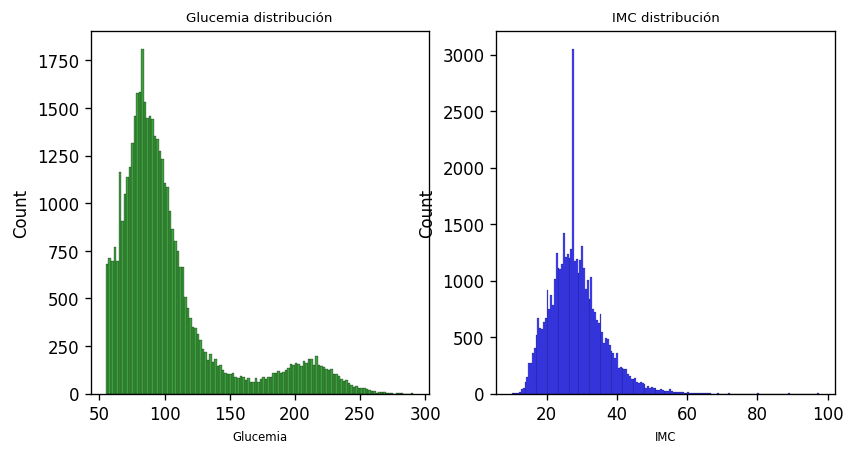

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

sns.histplot(ax=axes[0],x=df.Glucemia,color='green')
axes[0].set_title('Glucemia distribución',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucemia',fontdict={'fontsize':7})


sns.histplot(ax=axes[1],x=df.IMC,color='blue')
axes[1].set_title('IMC distribución',fontdict={'fontsize':8})
axes[1].set_xlabel('IMC',fontdict={'fontsize':7})

La glucemia tiene una distribución asimétrica a la derecha. La mayoría de los valores se encuentran dentro del rango normal.
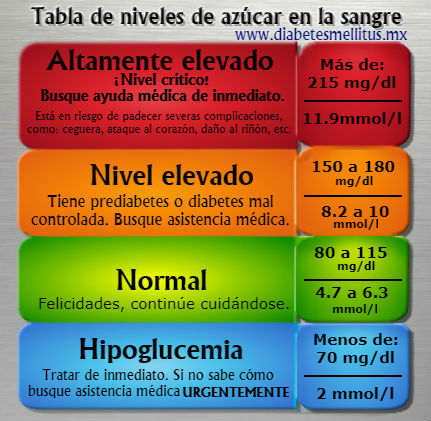

El imc también, hay valores extremos que pueden llegar a ser errores. Vemos que la mayoría de los valores está al rededor de 30, lo cual hace referencia a valores entre peso normal y sobrepeso. 

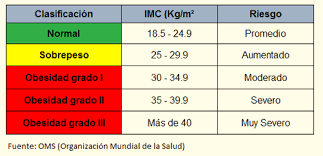

Vemos también la distribución de frecuencias de la Edad

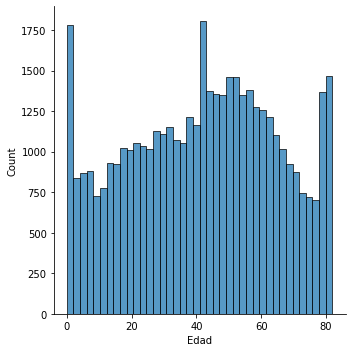

In [55]:
sns.displot(df.Edad)

La edad mínima es 0 años, habría que estudiar mejor la variable para ver si es un error

In [79]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nos advierte nuevamente que Edad tiene muchos valores 0, estudiamos más a profundidad esta variable

<AxesSubplot:xlabel='ACV', ylabel='Edad'>

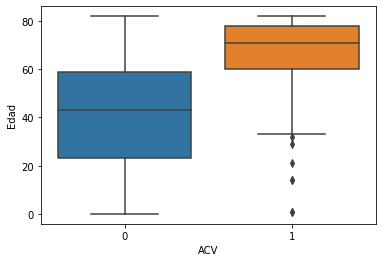

In [84]:
sns.boxplot(x=df.ACV, y=df.Edad)

Hay algunos valores extremos inferiores en el grupo de ha tenido ACV, puede ser gente joven que lo ha tenido

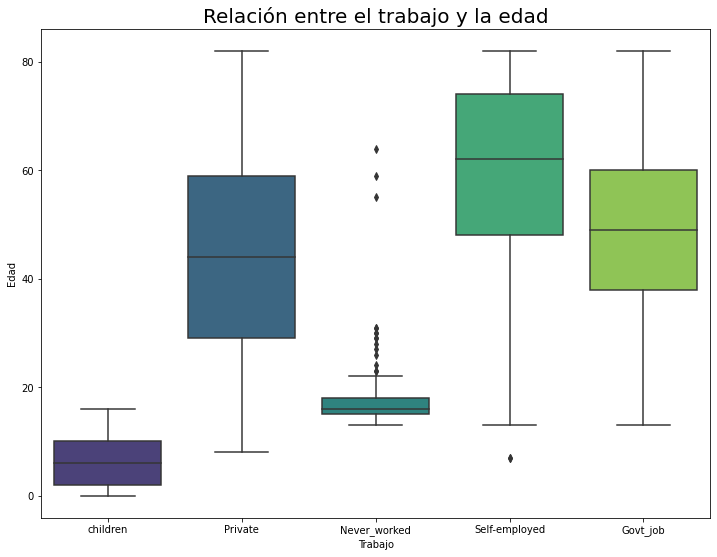

In [85]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=df['Trabajo'], y=df['Edad'], palette = 'viridis')
plt.title('Relación entre el trabajo y la edad', fontsize = 20)
plt.show()

Se podrían agrupar en una sola categoría los niños y los que nunca han trabajado, ya que los jóvenes podrían pertenecer a ambos grupos. Los menores de 17 años van a quedar en la categoría children y los mayores en la categoría never worked.

In [95]:
#pandas.DataFrame.loc[condition, column_label] = new_value
df.loc[df.Edad<=17,'Trabajo']= 'children'

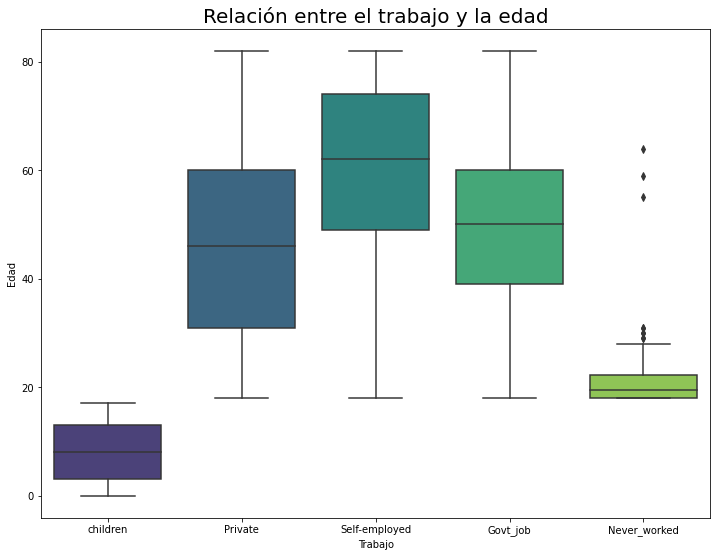

In [96]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=df['Trabajo'], y=df['Edad'], palette = 'viridis')
plt.title('Relación entre el trabajo y la edad', fontsize = 20)
plt.show()

In [97]:
df.to_csv('C:/Users/valei/Documents/DATA SCIENCE- CODER HOUSE/00. Trabajo final/data_stroke_transf.csv', index = False)

Continuamos con las correlaciones entre variables, según los warnings del Pandas profiling existen correlación entre algunas variables pero no son muy intensas

Text(0.5, 1.0, 'Heatmap')

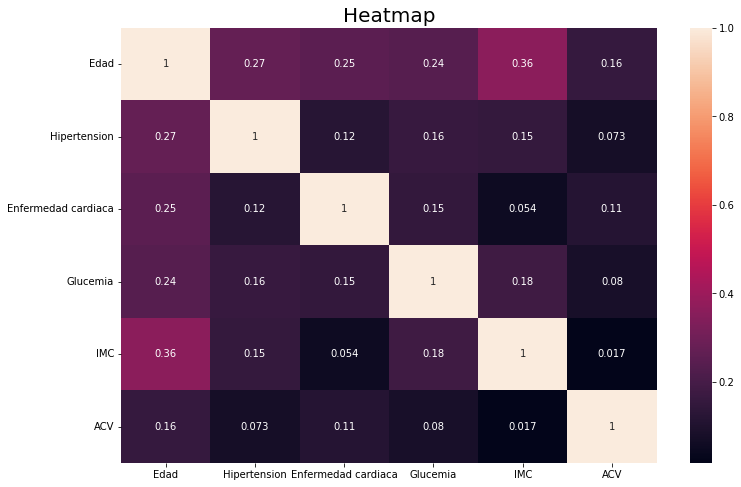

In [98]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);
plt.title('Heatmap', fontsize = 20, fontweight = 30)

Todas las correlaciones son positivas pero ninguna es muy fuerte. La más fuerte es la que existe entre la edad y el IMC 

Text(0.5, 1.0, 'Relacion entre la edad y el indice de masa corporal')

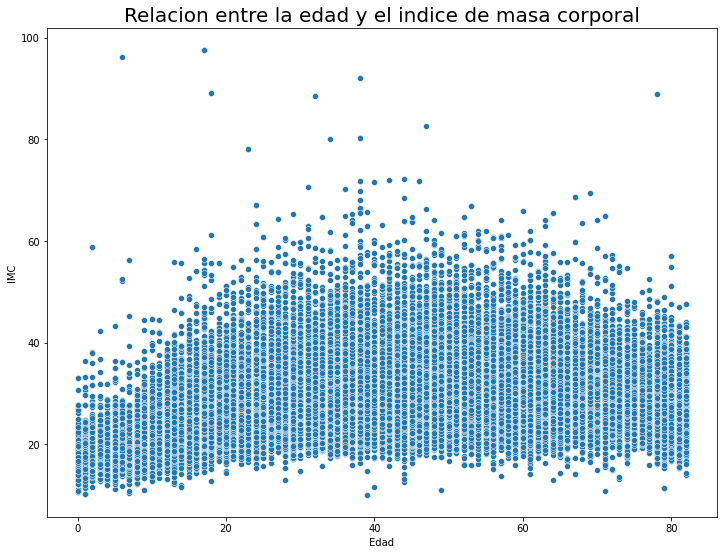

In [99]:
sns.scatterplot(x="Edad", y="IMC", data=df)
plt.title('Relacion entre la edad y el indice de masa corporal', fontsize = 20, fontweight = 30)

Seguimos estudiando la hipertensión y las enfermedades cardíacas con relación a las otras variables

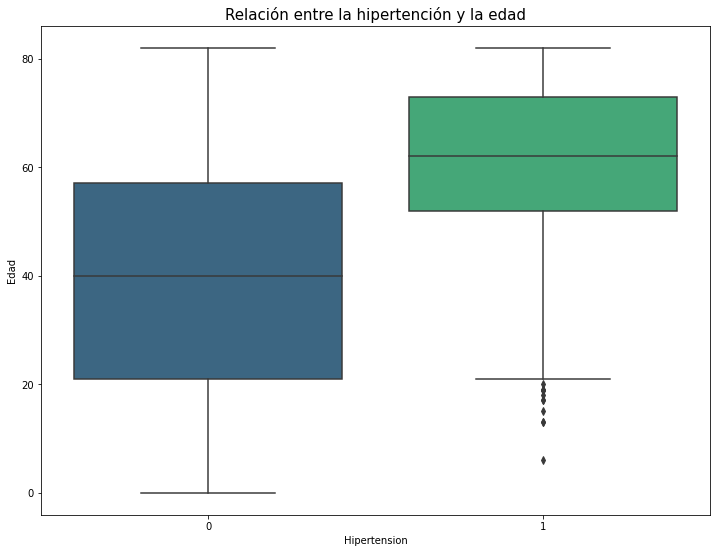

In [131]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=df['Hipertension'], y=df['Edad'], palette = 'viridis')
plt.title('Relación entre la hipertención y la edad', fontsize = 15)
plt.show()


La hipertensión es la elevación de los niveles de presión arterial de forma continua o sostenida.

Tiene muchos factores de riesgo, tales como la edad. El riesgo de tener presión arterial alta aumenta a medida que envejeces. Hasta los 64 años es más frecuente en los hombres. Las mujeres tienen más probabilidades de desarrollar presión arterial alta después de los 65 años.

En el gráfico podemos observar que para el grupo que ha padecido hipertensión el rango es más acotado con un mínimo de 20, a diferencia del grupo que no lo ha padecido que abarca personas más jóvenes.

En el grupo que lo ha padecido hay solo dos valores extremos que podrían no ser errores.

Podemos ver la relación entre la hipertensión y el sexo

In [107]:
pd.crosstab(df.Sexo, df.Hipertension,normalize=True).round(4)

Hipertension,0,1
Sexo,,
Female,0.5389,0.0507
Male,0.3693,0.0408
Other,0.0002,0.0000


In [113]:
stat_heart = df.groupby(['Hipertension', 'Enfermedad cardiaca','ACV']).mean()[['Glucemia','IMC', 'Edad']].round(2)
stat_heart

Glucemia    IMC   Edad
Hipertension Enfermedad cardiaca ACV                        
0            0                   0      100.71  28.00  38.39
                                 1      121.65  29.39  66.08
             1                   0      128.96  30.23  66.33
                                 1      148.09  28.97  71.60
1            0                   0      123.69  32.48  59.66
                                 1      130.42  29.68  69.86
             1                   0      139.24  31.03  69.44
                                 1      150.72  30.40  71.75

La mayoría de las personas con hipertensión han tenido enfermedades cardíacas. Las personas con hipertensión tienen indice de masa corporal más alto y niveles de glucosa altos.

Text(0.5, 1.0, 'Valores medios de acuerdo a condición médica')

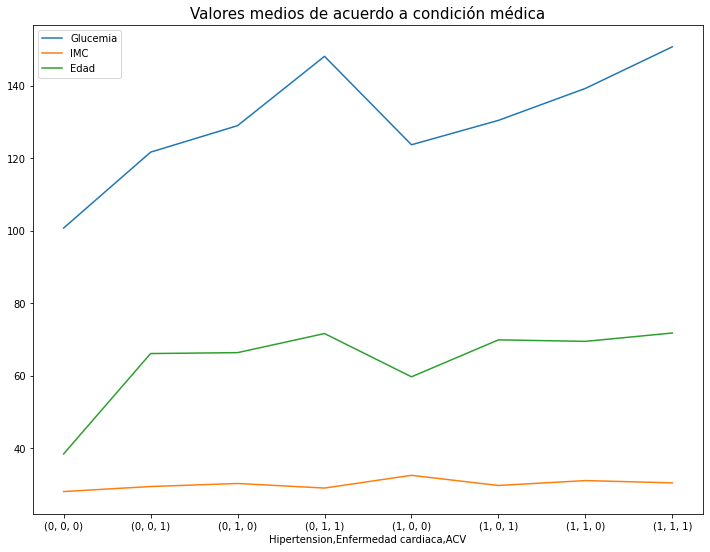

In [133]:
stat_heart.plot.line()
plt.title('Valores medios de acuerdo a condición médica', fontsize = 15)

Realizamos un análisis multivariado, comenzando con un pairplot

Text(0.5, 1.0, 'Relación entre variables')

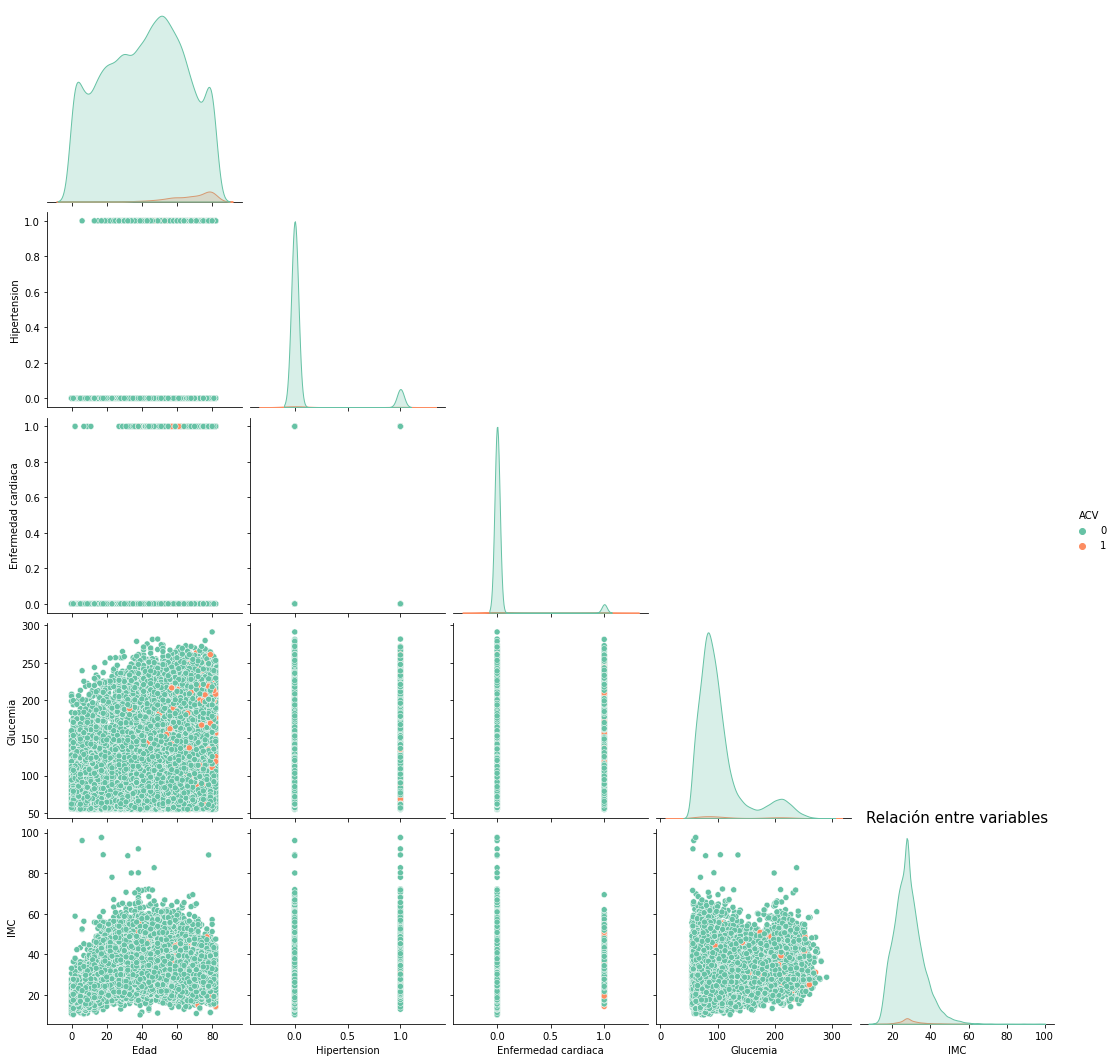

In [134]:
sns.pairplot(df,hue = 'ACV' , height = 3 , palette = 'Set2',corner=True)
plt.title('Relación entre variables', fontsize = 15)

C:\Users\valei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


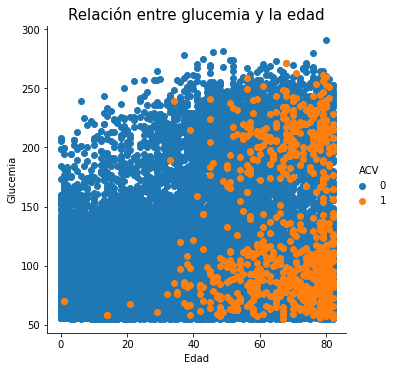

In [137]:
sns.FacetGrid(df,hue = 'ACV' , size = 5).map(plt.scatter,'Edad','Glucemia').add_legend();
plt.title('Relación entre glucemia y la edad', fontsize = 15)
plt.show()

Podemos identificar que el grupo que ha tenido un ACV está por encima de los 40 años y con valores de nivel de glucosa variados

C:\Users\valei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


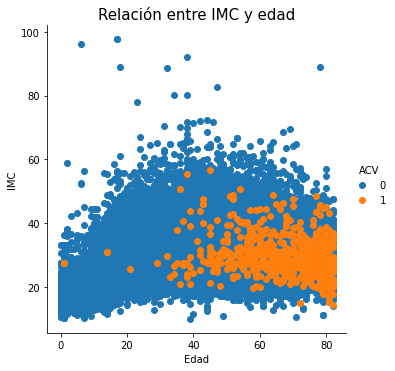

In [144]:
sns.FacetGrid(df,hue = 'ACV' , size = 5).map(plt.scatter,'Edad','IMC').add_legend();
plt.title('Relación entre IMC y edad', fontsize = 15)
plt.show()

C:\Users\valei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


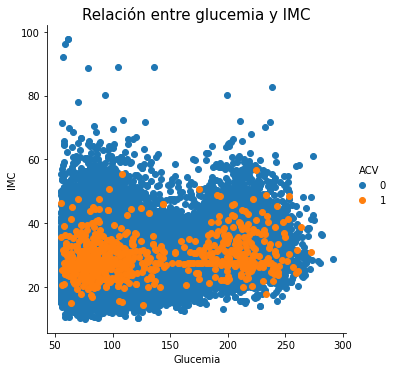

In [142]:
sns.FacetGrid(df,hue = 'ACV' , size = 5).map(plt.scatter,'Glucemia','IMC').add_legend();
plt.title('Relación entre glucemia y IMC', fontsize = 15)
plt.show()

Los niveles de glucosa y de indice de masa corporal de las personas con ACV no parecen distinguirlos de las personas que no lo tuvieron. Sí se ve un corte notable según la edad. 